In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_he_image(image_path):
    # Load the H&E image
    image = cv2.imread(image_path)
    return image

def foreground_mask_make(image):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([0, 0, 0])  # Adjust as needed
    upper_bound = np.array([180, 50, 255])  # Adjust as needed
    background_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    # Invert the mask to get the foreground (i.e., the tissue)
    foreground_mask = cv2.bitwise_not(background_mask)
    #plt.title('Foreground Mask')
    #plt.imshow(foreground_mask, cmap='gray')
    
    return foreground_mask

def foreground_extract(image,foreground_mask):
    #Apply the foreground mask to the original image to remove the background
    foreground_image = cv2.bitwise_and(image, image, mask=foreground_mask)

    #plt.title('Foreground Image')
    #plt.imshow(cv2.cvtColor(foreground_image, cv2.COLOR_BGR2RGB))
    
    return foreground_image

def red_channel_extract(foreground_image):
    # Extract the red channel from the foreground image
    red_channel = foreground_image[:, :, 2]

    #plt.title('Red Channel')
    #plt.imshow(red_channel, cmap='gray')
    
    return red_channel

def bin_he_image(threshold_value,red_channel):

    _, thresholded_image = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)

    #plt.title('Thresholded Image')
    #plt.imshow(thresholded_image, cmap='gray')
    
    return thresholded_image

def smooth_he_image(thresholded_image):
    smoothed_image = cv2.GaussianBlur(thresholded_image, (5, 5), 0)

    #plt.title('Smoothed Image')
    #plt.imshow(smoothed_image, cmap='gray')

    return smoothed_image

In [37]:
def preprocess_he(image_path,threshold_value,sample_name,output_directory):
    he_image = load_he_image(image_path)
    foreground_mask_he_image = foreground_mask_make(he_image)
    foreground_he_image = foreground_extract(he_image,foreground_mask_he_image)
    red_channel_he_image = red_channel_extract(foreground_he_image)
    thresholded_he_image = bin_he_image(threshold_value,red_channel_he_image)
    final_he_image = smooth_he_image(thresholded_he_image)
    
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(he_image, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title('Foreground Mask')
    plt.imshow(foreground_mask_he_image, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title('Foreground Image')
    plt.imshow(cv2.cvtColor(foreground_he_image, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 4)
    plt.title('Red Channel')
    plt.imshow(red_channel_he_image, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title('Thresholded Image')
    plt.imshow(thresholded_he_image, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.title('Smoothed Image')
    plt.imshow(final_he_image, cmap='gray')

    plt.tight_layout()
    fig_outpath = output_directory + '\\' + sample_name + '_HE_processed_image.png'
    plt.savefig(fig_outpath,bbox_inches='tight')
    
    return final_he_image

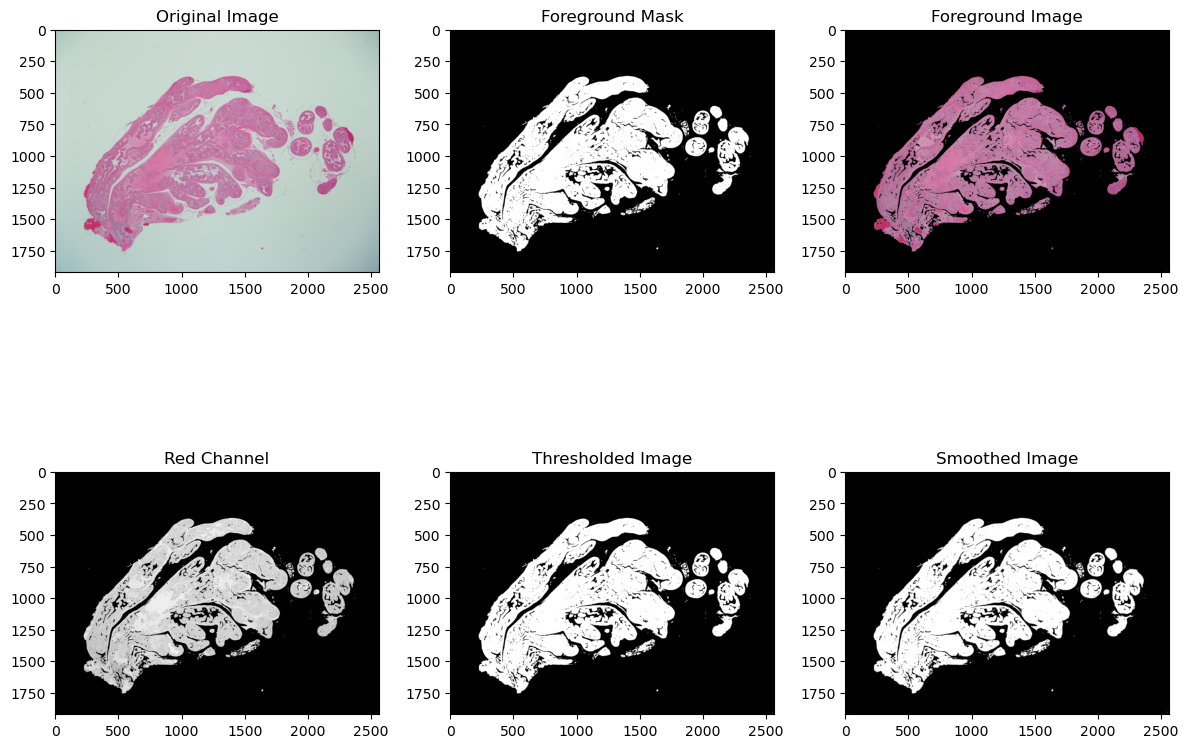

In [38]:
image_path = r"D:\Manuscripts\2024_MSIight\480_Rapiflex_HE_files\MSIght\H&E\R0012_AP_H&E_2X_2msExposure.tif"
threshold_value = 128
sample_name = 'R0012_norm_centroid'
output_directory = r"D:\Manuscripts\2024_MSIight\MSIght_results\final_code_test"

final_he_image = preprocess_he(image_path,threshold_value,sample_name,output_directory)